#  Real-Time Facial Emotion Recognition System

This notebook demonstrates how the emotion recognition model works, including training setup, prediction, and results.


In [4]:
from tensorflow.keras.models import load_model

model = load_model("model/emotion_model.h5")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)             │ (None, 46, 46, 32)   │         320 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d               │ (None, 23, 23, 32)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)           │ (None, 21, 21, 64)   │      18,496 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_1             │ (None, 10, 10, 64)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ flatten (Flatten)           │ (None, 6400)         │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense (Dense)               │ (None, 128)          │     819,328 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dropout (Dropout)           │ (None, 128)          │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 7)            │         903 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 839,049 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

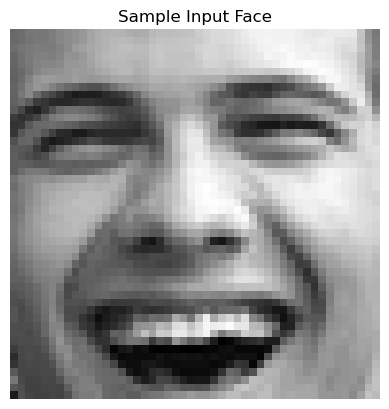

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocess_input

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


img = cv2.imread('dataset/archive/test/happy/PrivateTest_4315069.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Sample Input Face")
plt.axis('off')
plt.show()


In [8]:
# Preprocess the image
face = preprocess_input(img)

# Predict
pred = model.predict(face)[0]
predicted_emotion = emotion_labels[np.argmax(pred)]
print("Predicted Emotion:", predicted_emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
Predicted Emotion: Happy


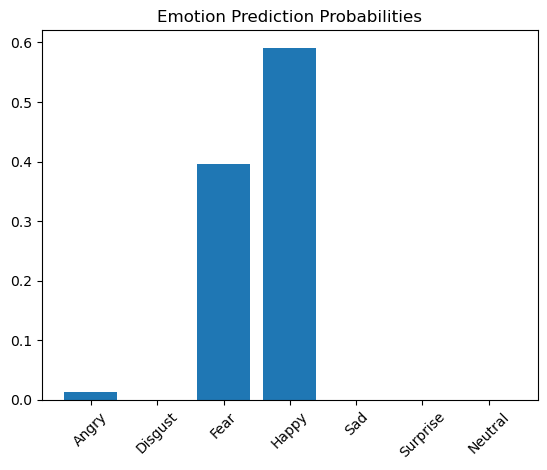

In [10]:
plt.bar(emotion_labels, pred)
plt.title("Emotion Prediction Probabilities")
plt.xticks(rotation=45)
plt.show()


# Real-Time Emotion Recognition

Real-time emotion recognition is implemented in `predict_webcam.py`.

**Features:**
- Webcam-based face detection using OpenCV
- Real-time predictions using CNN model
- Voice feedback (`pyttsx3`)
- 1-minute auto timeout with countdown


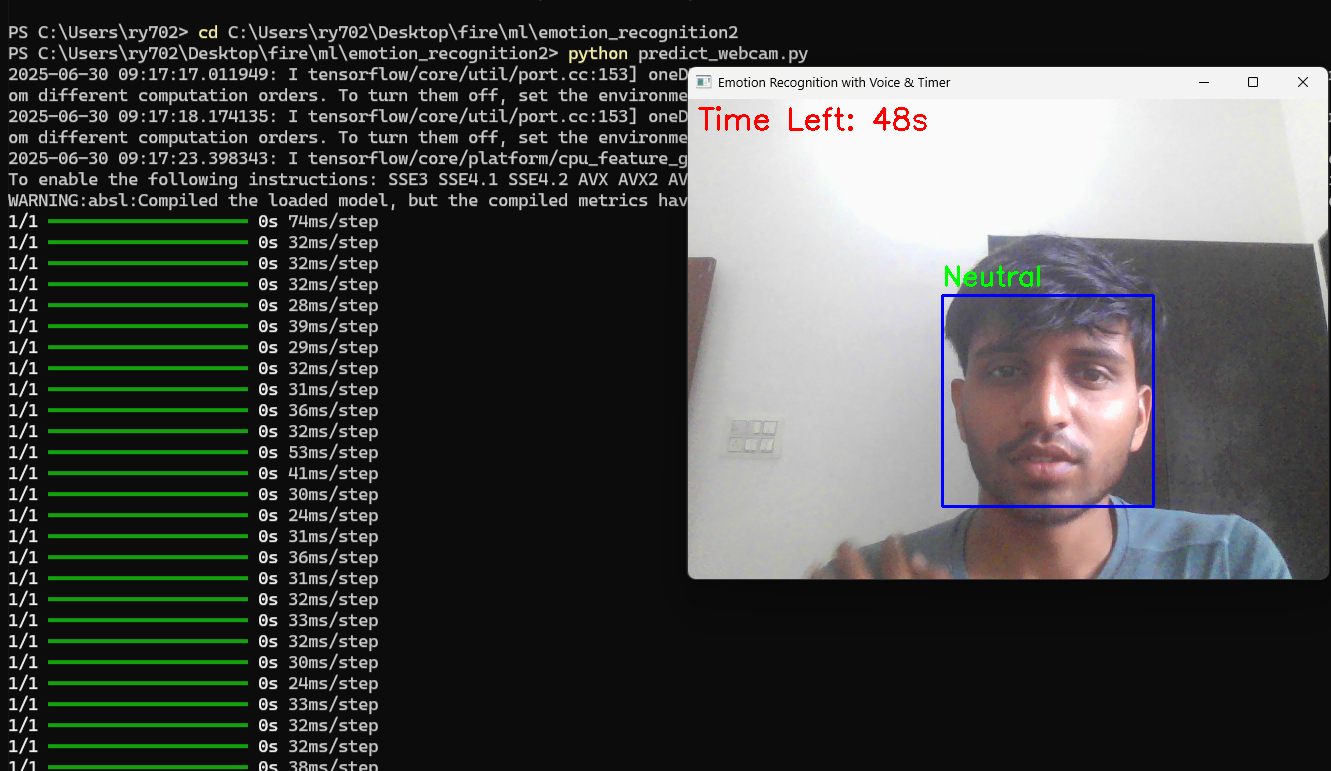

In [36]:
from IPython.display import Image, display

display(Image(filename="output/shot1.png"))

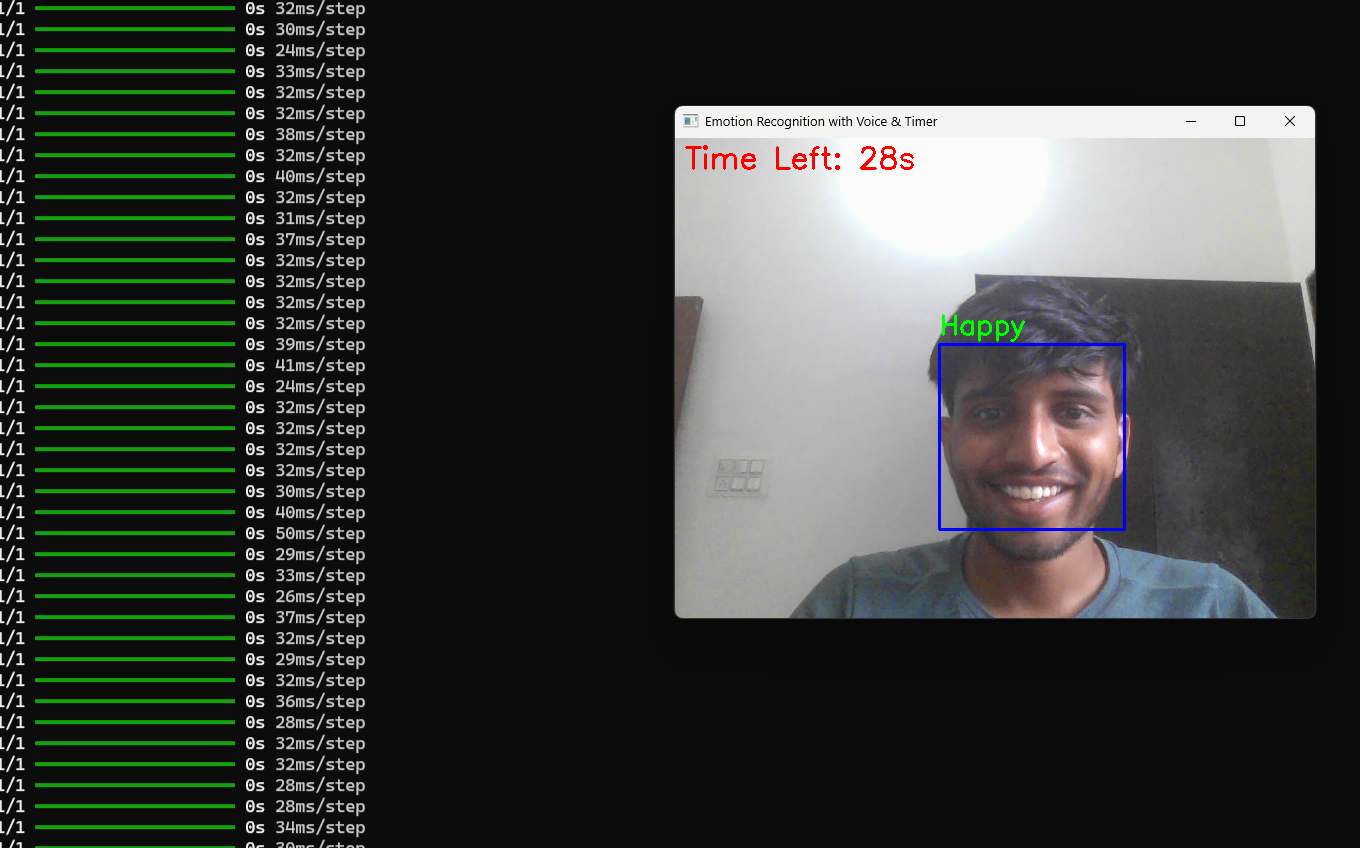

In [34]:
display(Image(filename="output/shot2.png"))

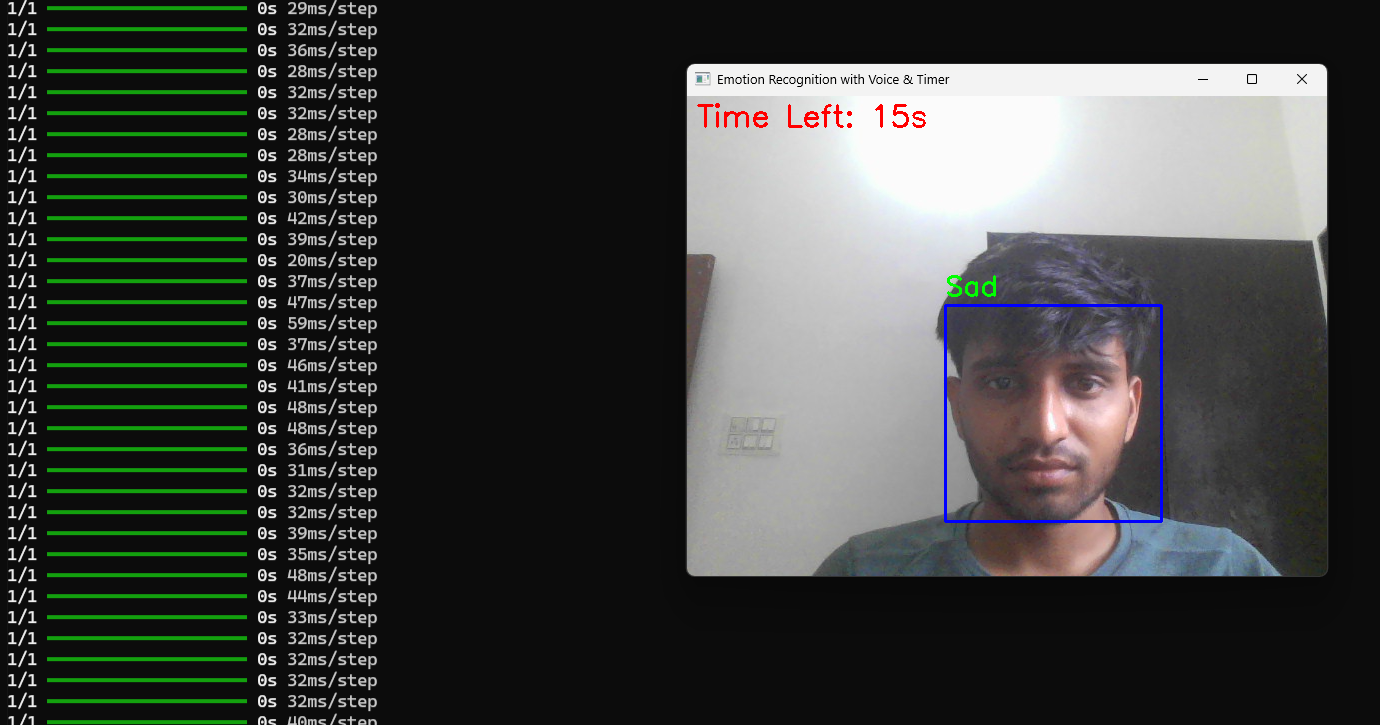

In [30]:
display(Image(filename="output/shot3.png"))

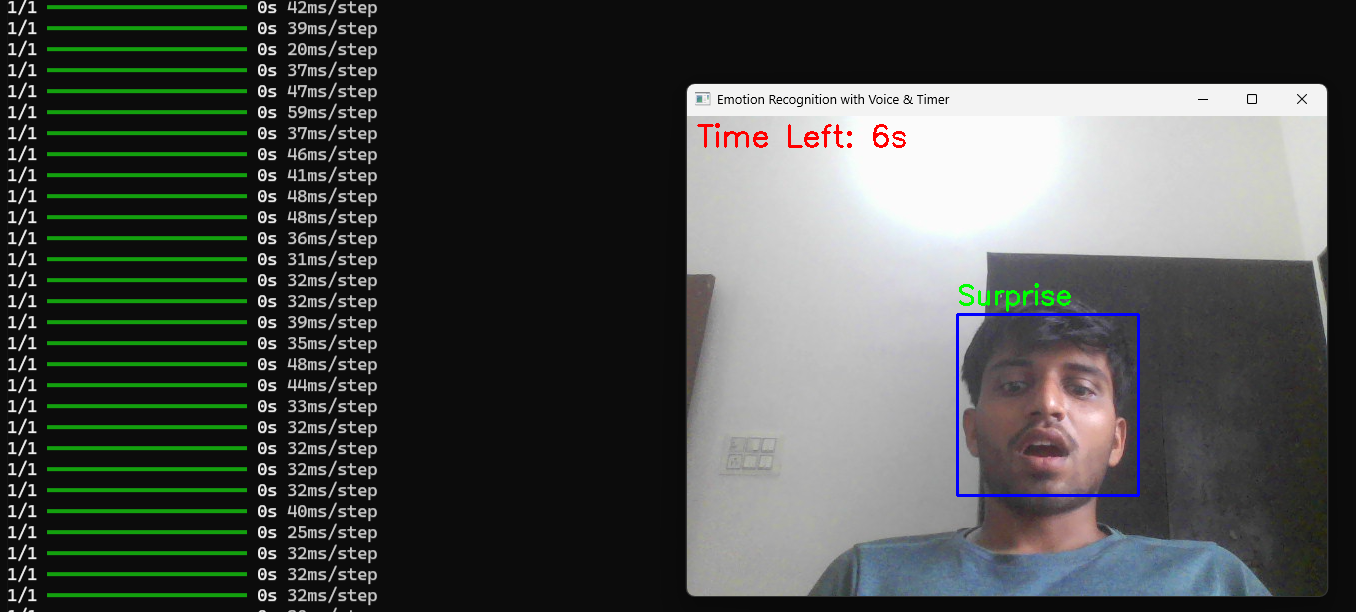

In [32]:
display(Image(filename="output/shot4.png"))